<a href="https://colab.research.google.com/github/RonnyGuevara/Digital-image-processing/blob/main/USAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Lectura de librerías
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Lectura de la data
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ETL.xlsx')
df

,Genero,Edad,Altura,Peso,BECK,Tipo de depresion,STAI.ANSIEDAD,Tipo de ansiedad,Bullying,Sufre de bullying,IMC,Tipo de sobrepeso,Nivel de educación
0,Femenino,Entre 50 y 59 años,1.50,65.0,3,Sin depresion,26,Ansiedad sobre promedio mujeres,52,Bullying,28.888889,Sobrepeso,Posgrados
1,Femenino,Entre 20 y 29 años,1.65,61.0,0,Sin depresion,26,Ansiedad sobre promedio mujeres,49,No Bullying,22.405877,Rango normal,Universitario y terciario completo
2,Femenino,Entre 40 y 49 años,1.52,105.0,22,Depresion moderada mujeres,29,Ansiedad sobre promedio mujeres,68,No Bullying,45.446676,Obesas Clase 3,Universitario incompleto o terciario incompleto
3,Femenino,Entre 20 y 29 años,1.60,54.0,1,Sin depresion,26,Ansiedad sobre promedio mujeres,42,No Bullying,21.093750,Rango normal,Posgrados
4,Femenino,Entre 40 y 49 años,1.65,64.0,5,Sin depresion,24,Ansiedad promedio mujeres,45,No Bullying,23.507805,Rango normal,Posgrados
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Femenino,Entre 40 y 49 años,1.68,80.0,4,Sin depresion,27,Ansiedad sobre promedio mujeres,79,No Bullying,28.344671,Sobrepeso,Universitario incompleto o terciario incompleto
70,Femenino,Entre 20 y 29 años,1.56,50.0,11,Depresion leve mujeres,26,Ansiedad sobre promedio mujeres,92,Bullying,20.545694,Rango normal,Secundario completo
71,Femenino,Entre 20 y 29 años,1.62,46.0,2,Sin depresion,22,Ansiedad tend. promedio mujeres,40,Bullying,17.527816,Rango normal,Universitario incompleto o terciario incompleto
72,Femenino,Entre 20 y 29 años,1.64,59.0,5,Sin depresion,27,Ansiedad sobre promedio mujeres,55,No Bullying,21.936347,Rango normal,Universitario incompleto o terciario incompleto


In [13]:
#Visualización de los atributos
df.columns

Index(['Genero', 'Edad', 'Altura', 'Peso', 'BECK ', 'Tipo de depresion',
       'STAI.ANSIEDAD', 'Tipo de ansiedad', 'Bullying', 'Sufre de bullying',
       'IMC', 'Tipo de sobrepeso', 'Nivel de educación'],
      dtype='object')

In [5]:
#Cuenta los valores nulos para cada columna
df.isnull().values.sum()

0

In [14]:
# Drop null row values
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 0 to 73
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Genero              74 non-null     int64  
 1   Edad                74 non-null     object 
 2   Altura              74 non-null     float64
 3   Peso                74 non-null     float64
 4   BECK                74 non-null     int64  
 5   Tipo de depresion   74 non-null     object 
 6   STAI.ANSIEDAD       74 non-null     int64  
 7   Tipo de ansiedad    74 non-null     object 
 8   Bullying            74 non-null     int64  
 9   Sufre de bullying   74 non-null     object 
 10  IMC                 74 non-null     float64
 11  Tipo de sobrepeso   74 non-null     object 
 12  Nivel de educación  74 non-null     object 
dtypes: float64(3), int64(4), object(6)
memory usage: 8.1+ KB


In [6]:
#Permite obtener los estadísticos descriptivos
df.describe()

,Altura,Peso,BECK,STAI.ANSIEDAD,Bullying,IMC
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,1.625811,70.381081,10.405405,25.216216,59.324324,26.585722
std,0.065835,16.652654,9.367561,3.508386,20.453829,5.834378
min,1.440000,45.000000,0.000000,19.000000,33.000000,16.528926
25%,1.592500,58.000000,3.000000,23.000000,44.000000,22.146735
50%,1.625000,66.500000,8.000000,25.000000,53.500000,25.233893
75%,1.657500,80.000000,15.750000,27.000000,70.500000,29.865328
max,1.780000,125.000000,42.000000,34.000000,128.000000,45.446676


In [7]:
#info() devuelve el total de valores no nulos y tipo de dato para cada atributo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Genero              74 non-null     object 
 1   Edad                74 non-null     object 
 2   Altura              74 non-null     float64
 3   Peso                74 non-null     float64
 4   BECK                74 non-null     int64  
 5   Tipo de depresion   74 non-null     object 
 6   STAI.ANSIEDAD       74 non-null     int64  
 7   Tipo de ansiedad    74 non-null     object 
 8   Bullying            74 non-null     int64  
 9   Sufre de bullying   74 non-null     object 
 10  IMC                 74 non-null     float64
 11  Tipo de sobrepeso   74 non-null     object 
 12  Nivel de educación  74 non-null     object 
dtypes: float64(3), int64(3), object(7)
memory usage: 7.6+ KB


In [8]:
df.corr()

,Altura,Peso,BECK,STAI.ANSIEDAD,Bullying,IMC
Altura,1.000000,0.359658,0.224914,0.152838,0.329913,-0.012133
Peso,0.359658,1.000000,0.361504,0.099369,0.523422,0.924868
BECK,0.224914,0.361504,1.000000,0.532070,0.540307,0.299246
STAI.ANSIEDAD,0.152838,0.099369,0.532070,1.000000,0.423560,0.048181
Bullying,0.329913,0.523422,0.540307,0.423560,1.000000,0.413068
IMC,-0.012133,0.924868,0.299246,0.048181,0.413068,1.000000


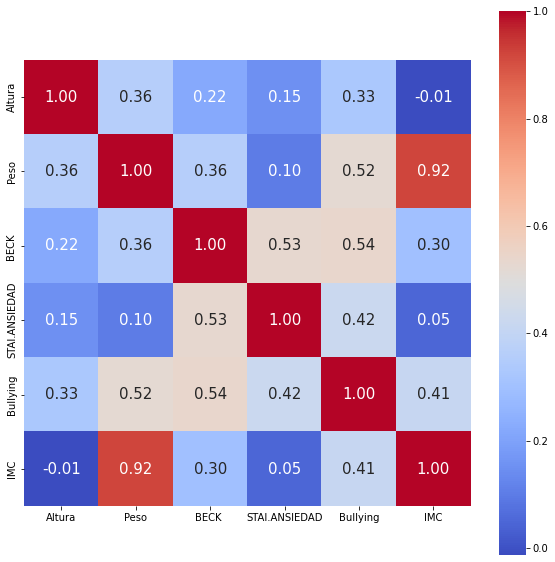

In [9]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= corr, yticklabels= corr,
           cmap= 'coolwarm')

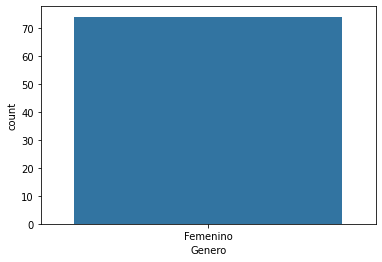

In [10]:
sns.countplot(df['Genero'],label="Count")

In [11]:
#Asignaremos un valor entero al atributo 'Género' donde 'Masculino':1,'Femenino':0
df['Genero']=df['Genero'].map({'Masculino':1,'Femenino':0})
df

,Genero,Edad,Altura,Peso,BECK,Tipo de depresion,STAI.ANSIEDAD,Tipo de ansiedad,Bullying,Sufre de bullying,IMC,Tipo de sobrepeso,Nivel de educación
0,0,Entre 50 y 59 años,1.50,65.0,3,Sin depresion,26,Ansiedad sobre promedio mujeres,52,Bullying,28.888889,Sobrepeso,Posgrados
1,0,Entre 20 y 29 años,1.65,61.0,0,Sin depresion,26,Ansiedad sobre promedio mujeres,49,No Bullying,22.405877,Rango normal,Universitario y terciario completo
2,0,Entre 40 y 49 años,1.52,105.0,22,Depresion moderada mujeres,29,Ansiedad sobre promedio mujeres,68,No Bullying,45.446676,Obesas Clase 3,Universitario incompleto o terciario incompleto
3,0,Entre 20 y 29 años,1.60,54.0,1,Sin depresion,26,Ansiedad sobre promedio mujeres,42,No Bullying,21.093750,Rango normal,Posgrados
4,0,Entre 40 y 49 años,1.65,64.0,5,Sin depresion,24,Ansiedad promedio mujeres,45,No Bullying,23.507805,Rango normal,Posgrados
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,0,Entre 40 y 49 años,1.68,80.0,4,Sin depresion,27,Ansiedad sobre promedio mujeres,79,No Bullying,28.344671,Sobrepeso,Universitario incompleto o terciario incompleto
70,0,Entre 20 y 29 años,1.56,50.0,11,Depresion leve mujeres,26,Ansiedad sobre promedio mujeres,92,Bullying,20.545694,Rango normal,Secundario completo
71,0,Entre 20 y 29 años,1.62,46.0,2,Sin depresion,22,Ansiedad tend. promedio mujeres,40,Bullying,17.527816,Rango normal,Universitario incompleto o terciario incompleto
72,0,Entre 20 y 29 años,1.64,59.0,5,Sin depresion,27,Ansiedad sobre promedio mujeres,55,No Bullying,21.936347,Rango normal,Universitario incompleto o terciario incompleto


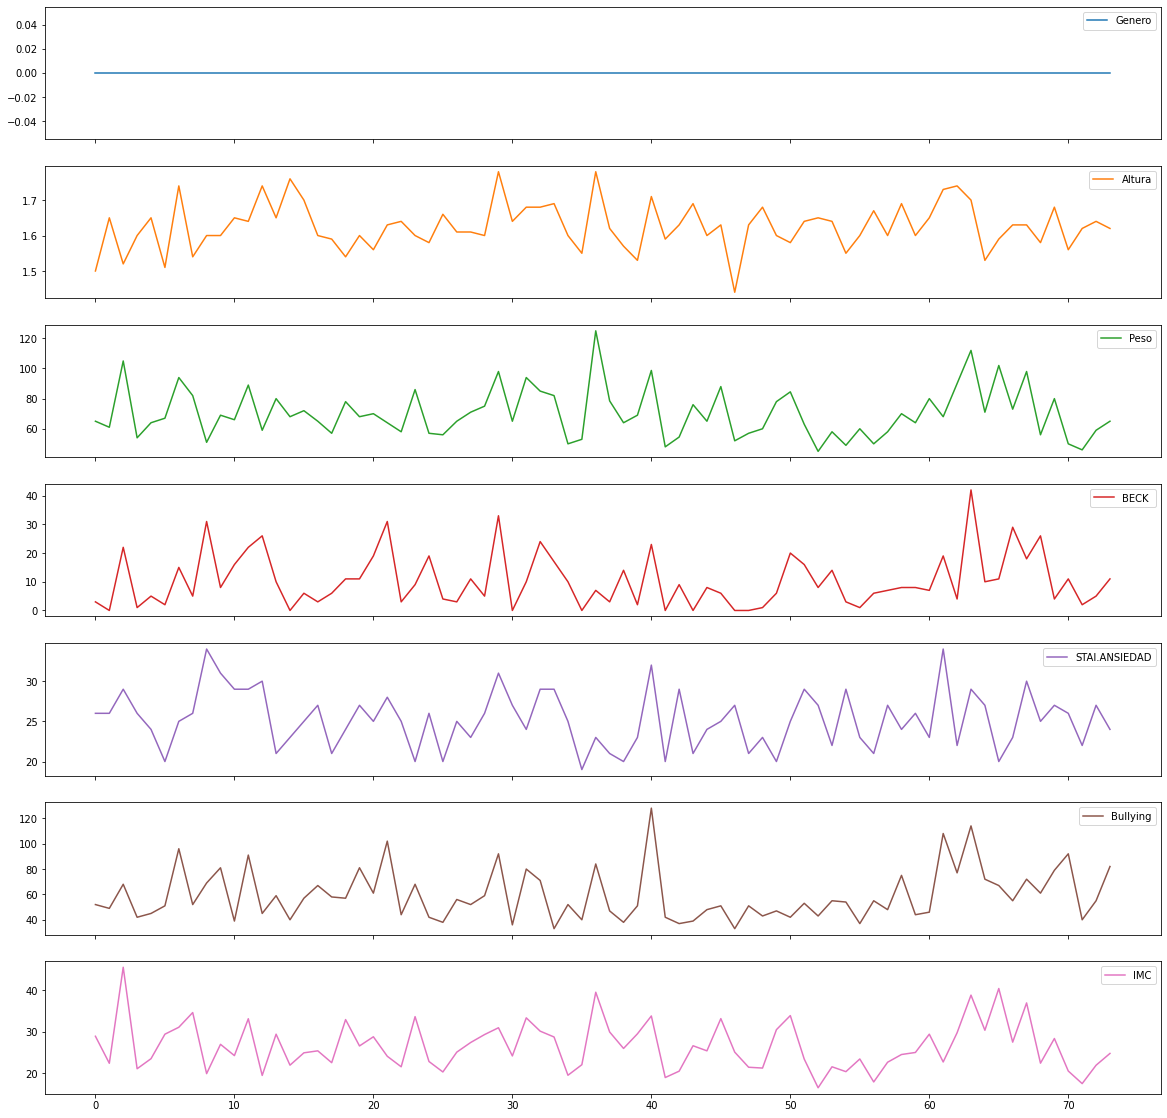

In [12]:
#Diagramas con respecto al atributo 'IMC'
df.plot(label='IMC', subplots=True, figsize=(20,20))
plt.show()